some ontes about it 
- put lambda 0 
- starting computing iterations


In [1]:
import numpy as np
from utils.utils import Function, GradientDescent

In [2]:
def f33(x):
    return x[0] ** 2 + x[1] ** 2

def df33(x):
    return np.array([2*x[0], 2*x[1]])

def ddf33(x):
    return np.array([[2, 0], [0, 2]])

ffff = Function(f33, df33, ddf33)


In [3]:
# define the first constraints
constraint1 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

constraint2 = Function(
    lambda x: 3 - x[1],
    lambda x: np.array([0, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)



In [4]:
from utils.utils import UzawaSolver

uzawa = UzawaSolver(ffff, [constraint2])

uzawa.solve_min(x0_internal=np.array([5, 8]), _lambda=np.array([5]), tau=1, use_epsilon=False, epsilon=1e-30, max_iter=3)


array([8.92029808e-05, 2.87502007e+00])

In [5]:
# the training information is available in the uzawa object
len(uzawa.f_gradient_history), \
len(uzawa.f_value_history), \
len(uzawa.lagrangian_value_history), \
len(uzawa.lagrangian_gradient_history), \
len(uzawa.lambda_history), uzawa.iters, \
len(uzawa.f_increment_history), \
len(uzawa.lagrangian_increment_history), \
len(uzawa.tau_history)

(3, 3, 3, 3, 3, 3, 3, 3, 3)

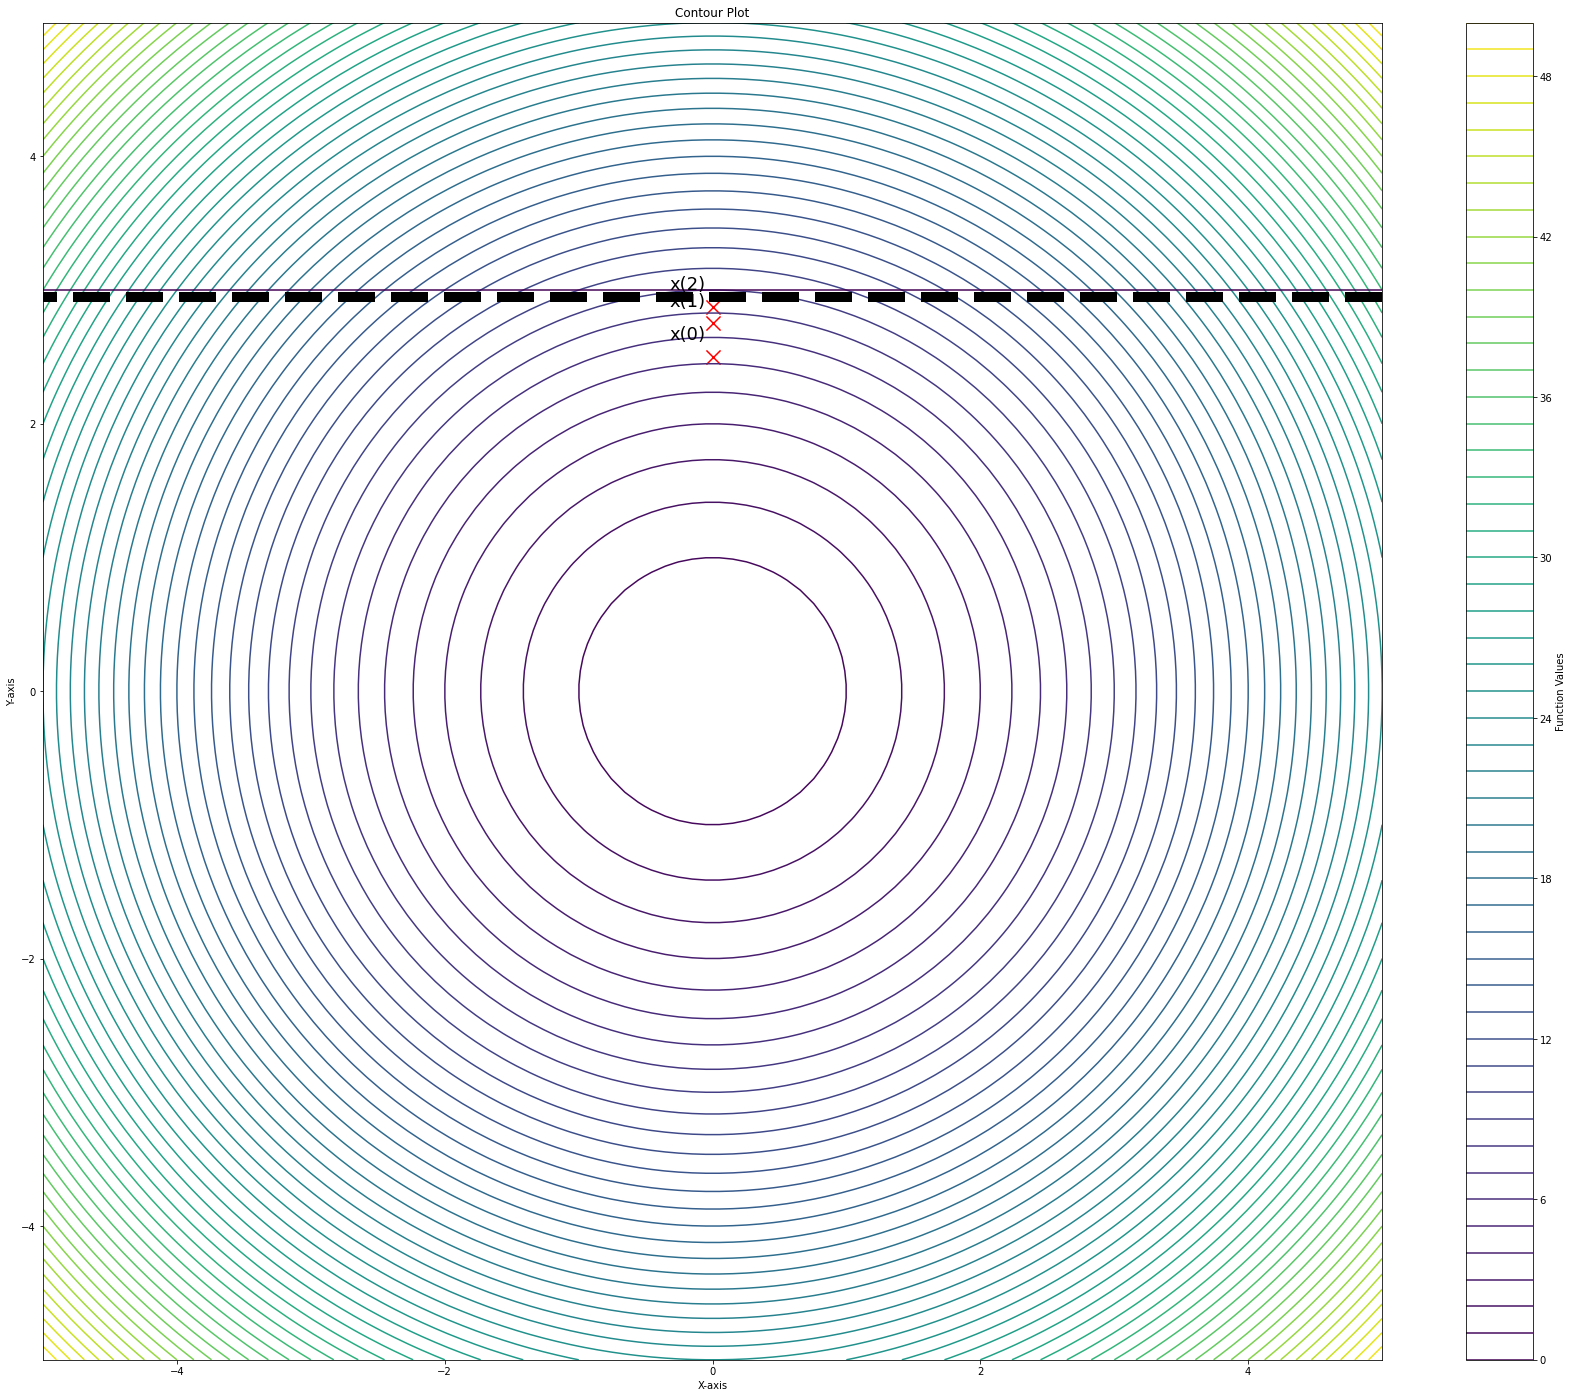

In [6]:
from utils.utils import UzawaPlotter

plotter = UzawaPlotter(solver=uzawa)
plotter.plot()

In [7]:
uzawa.x_history

[array([8.92029808e-05, 2.50009812e+00]),
 array([8.92029808e-05, 2.75004460e+00]),
 array([8.92029808e-05, 2.87502007e+00])]

In [8]:
uzawa.lambda_history

[array([5]), array([5.49990188]), array([5.74985727])]

In [9]:
uzawa.lagrangian_increment_history

[array([0.00017841, 0.00019625]),
 array([ 0.0000000e+00, -8.9185475e-06]),
 array([ 0.00000000e+00, -4.45935331e-06])]

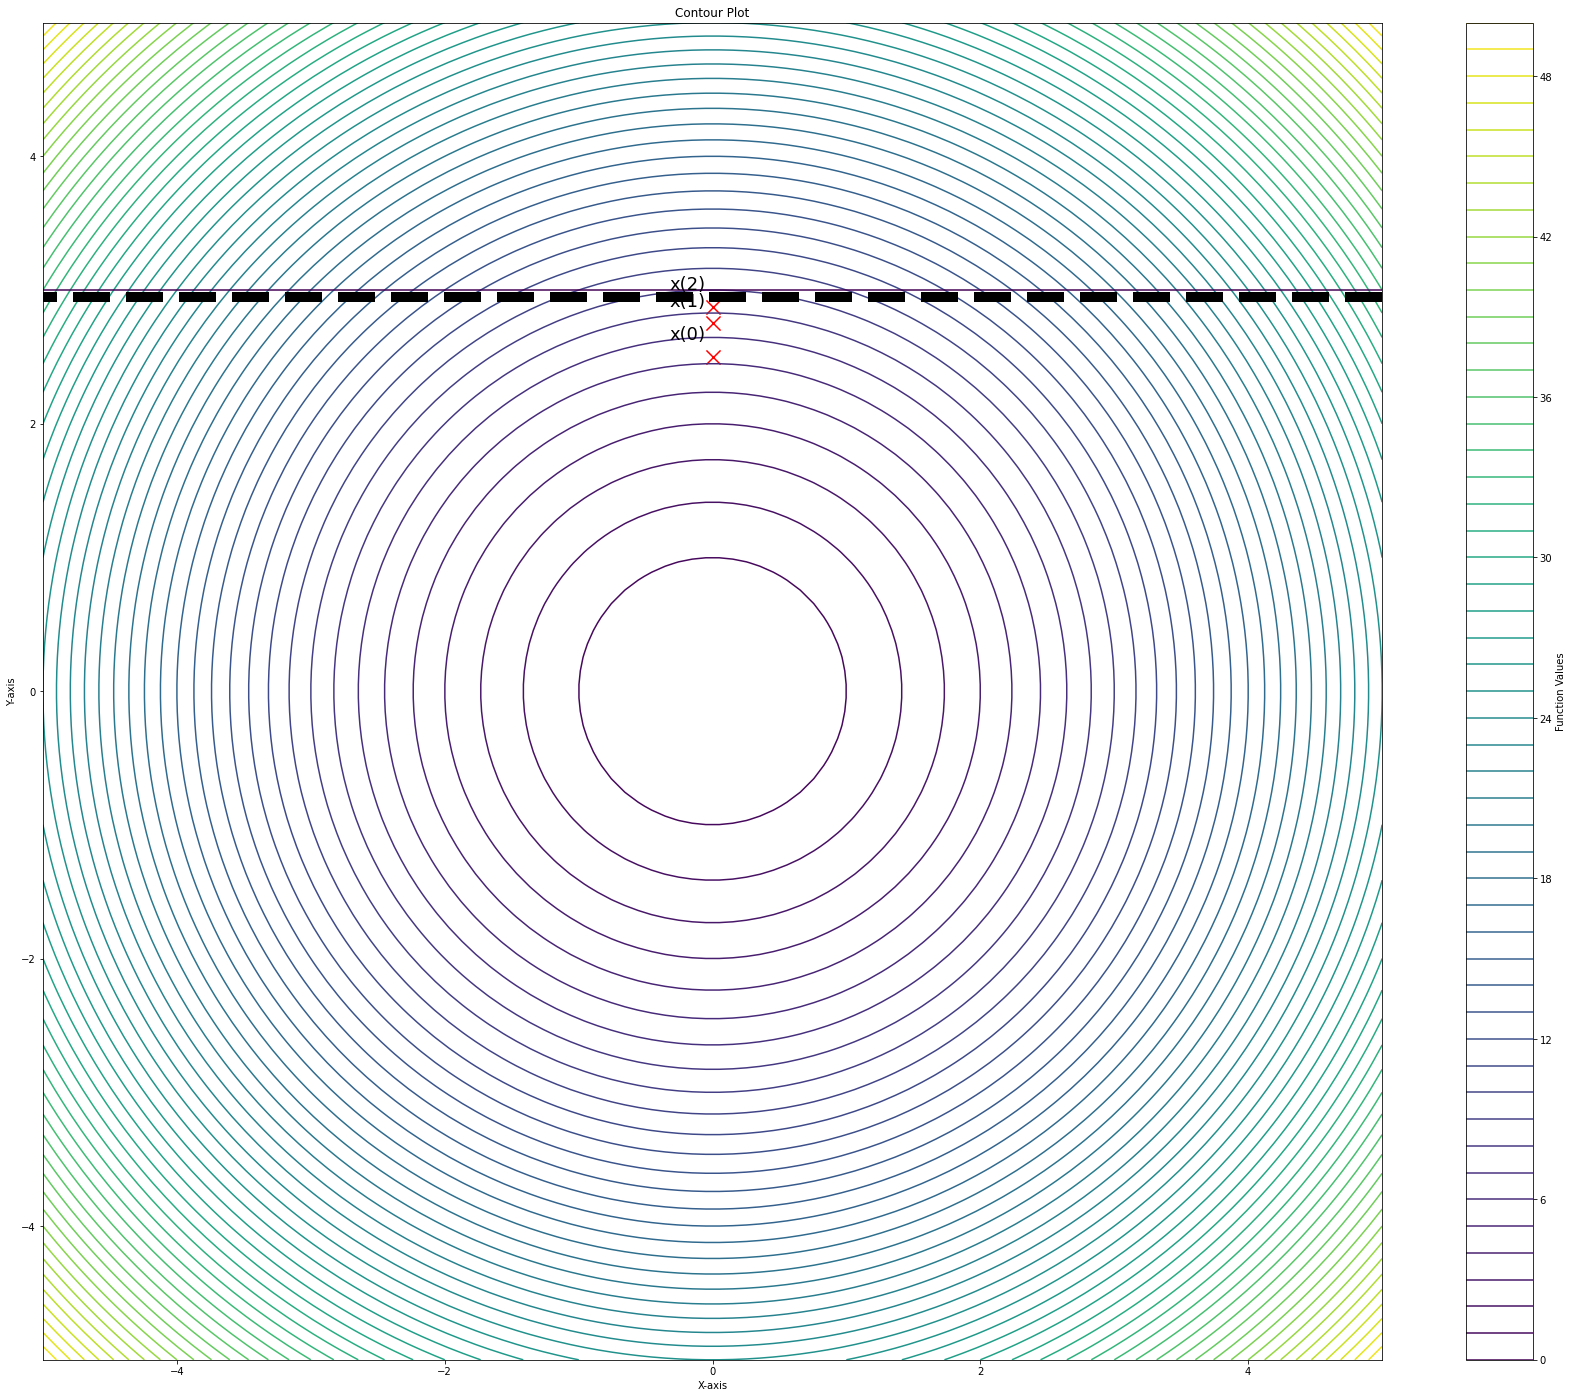

In [10]:
from utils.utils import UzawaPlotter

plotterr = UzawaPlotter(solver=uzawa)
plotterr.plot()



In [11]:
uzawa.lambda_history

[array([5]), array([5.49990188]), array([5.74985727])]

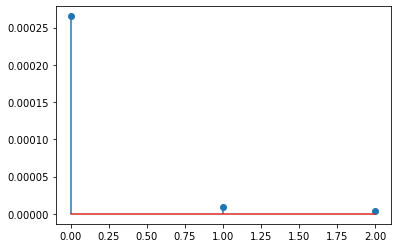

In [12]:
plotter.plot_lagrangian_increments(use_log=True)

In [14]:
gd_solver = GradientDescent(ffff)
x_history_2, gradient_history_2, lr_history_2, value_history_2, current_iteration_2 = \
gd_solver.solve(np.array([1, 3]))

continue: True


In [22]:
f22 = Function()

TypeError: __init__() missing 3 required positional arguments: 'compute', 'gradient', and 'hessian'

In [6]:
bbb = np.array([3])
bbb[0] = max(0, 4)
bbb

array([4])

In [10]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = np.vectorize(lambda x, y: np.abs((x * y) % 7))(a, b)
a, b, c

(array([1, 2, 3]), array([4, 5, 6]), array([4, 3, 4]))

In [8]:
import numpy as np
a = np.array([np.inf])
b = np.array([4])

b = a
a = 777


777 [inf]
